In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from string import punctuation
import nltk

In [ ]:
reviews = pd.read_csv('Reviews.csv', nrows=4000) # original dataset has 568,454 rows
reviews

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
3995,3996,B00110FN28,A99TG4Q2ZPW7S,"Blu-estLight ""MyEnglishIsGood""",0,0,4,1310083200,one of my favorite cookies,These cookies are both yummy and well priced. ...
3996,3997,B00110FN28,A3NEAETOSXDBOM,Stephen M. Charme,0,0,5,1299801600,Our favorite grocery store chocolate chip cookie,"This is not a gourmet chocolate chip cookie, b..."
3997,3998,B00110FN28,A1O229NVVDJUX2,"Anthony Pantliano ""The Photo Guy""",0,0,4,1265068800,Arrived Fresh and in Good Shape.,"It's a lot of cookies, but the price is very g..."
3998,3999,B00110FN28,A33OGWG3ZABMZE,S. Whitcher,0,0,4,1261958400,"Delicious, though a bit on the small side.",Delicious cookies. I actually thought I was o...


In [ ]:
reviews['Highest_Score'] = pd.Series([1 if x > 4 else 0 for x in reviews['Score']], index=reviews.index)
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Highest_Score
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1


In [ ]:
reviews.info()
reviews.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      4000 non-null   int64 
 1   ProductId               4000 non-null   object
 2   UserId                  4000 non-null   object
 3   ProfileName             4000 non-null   object
 4   HelpfulnessNumerator    4000 non-null   int64 
 5   HelpfulnessDenominator  4000 non-null   int64 
 6   Score                   4000 non-null   int64 
 7   Time                    4000 non-null   int64 
 8   Summary                 4000 non-null   object
 9   Text                    4000 non-null   object
 10  Highest_Score           4000 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 343.9+ KB


,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Highest_Score
count,4000.000000,4000.00000,4000.000000,4000.000000,4.000000e+03,4000.00000
mean,2000.500000,1.52100,1.949500,4.159250,1.293793e+09,0.63525
std,1154.844867,5.25937,6.015106,1.327716,5.006160e+07,0.48142
min,1.000000,0.00000,0.000000,1.000000,9.617184e+08,0.00000
25%,1000.750000,0.00000,0.000000,4.000000,1.268071e+09,0.00000
50%,2000.500000,0.00000,1.000000,5.000000,1.310515e+09,1.00000
75%,3000.250000,2.00000,2.000000,5.000000,1.330387e+09,1.00000
max,4000.000000,187.00000,216.000000,5.000000,1.351210e+09,1.00000


Highest_Score
1    2541
0    1459
Name: count, dtype: int64


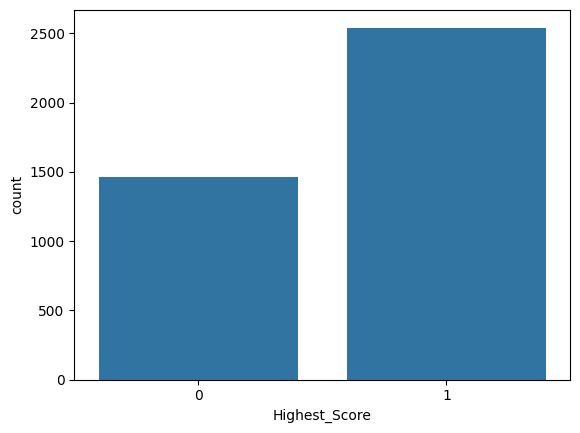

In [ ]:
# plot positive vs non positive score distribution
sns.countplot(reviews[['Highest_Score']], x='Highest_Score');
print(reviews['Highest_Score'].value_counts())

In [ ]:
2541/4000

0.63525

In [ ]:
text = reviews['Text']
text

,Text
0,I have bought several of the Vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...
2,This is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...
...,...
3995,These cookies are both yummy and well priced. ...
3996,"This is not a gourmet chocolate chip cookie, b..."
3997,"It's a lot of cookies, but the price is very g..."
3998,Delicious cookies. I actually thought I was o...


In [ ]:
# make text lowercase
text_lowercase = text.str.lower()
text_lowercase

,Text
0,i have bought several of the vitality canned d...
1,product arrived labeled as jumbo salted peanut...
2,this is a confection that has been around a fe...
3,if you are looking for the secret ingredient i...
4,great taffy at a great price. there was a wid...
...,...
3995,these cookies are both yummy and well priced. ...
3996,"this is not a gourmet chocolate chip cookie, b..."
3997,"it's a lot of cookies, but the price is very g..."
3998,delicious cookies. i actually thought i was o...


In [ ]:
# remove punctuation
def remove_punctuation(document):
    no_punct = ''.join([character for character in document if character not in punctuation])
    return no_punct

text_no_punct = text_lowercase.apply(remove_punctuation)
text_no_punct

,Text
0,i have bought several of the vitality canned d...
1,product arrived labeled as jumbo salted peanut...
2,this is a confection that has been around a fe...
3,if you are looking for the secret ingredient i...
4,great taffy at a great price there was a wide...
...,...
3995,these cookies are both yummy and well priced i...
3996,this is not a gourmet chocolate chip cookie bu...
3997,its a lot of cookies but the price is very goo...
3998,delicious cookies i actually thought i was or...


In [ ]:
# remove digits
def remove_digit(document):
    no_digit = ''.join([character for character in document if not character.isdigit()])
    return no_digit
text_no_digit = text_no_punct.apply(remove_digit)
text_no_digit

,Text
0,i have bought several of the vitality canned d...
1,product arrived labeled as jumbo salted peanut...
2,this is a confection that has been around a fe...
3,if you are looking for the secret ingredient i...
4,great taffy at a great price there was a wide...
...,...
3995,these cookies are both yummy and well priced i...
3996,this is not a gourmet chocolate chip cookie bu...
3997,its a lot of cookies but the price is very goo...
3998,delicious cookies i actually thought i was or...


In [ ]:
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

text_tokenized = text_no_digit.apply(word_tokenize)
text_tokenized.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,Text
0,"[i, have, bought, several, of, the, vitality, ..."
1,"[product, arrived, labeled, as, jumbo, salted,..."
2,"[this, is, a, confection, that, has, been, aro..."
3,"[if, you, are, looking, for, the, secret, ingr..."
4,"[great, taffy, at, a, great, price, there, was..."


In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
stop_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [ ]:
def remove_stopwords(document):
    words = [word for word in document if not word in stop_words]
    return words

text_no_stop = text_tokenized.apply(remove_stopwords)
text_no_stop

,Text
0,"[bought, several, vitality, canned, dog, food,..."
1,"[product, arrived, labeled, jumbo, salted, pea..."
2,"[confection, around, centuries, light, pillowy..."
3,"[looking, secret, ingredient, robitussin, beli..."
4,"[great, taffy, great, price, wide, assortment,..."
...,...
3995,"[cookies, yummy, well, priced, recommend, cook..."
3996,"[gourmet, chocolate, chip, cookie, best, choco..."
3997,"[lot, cookies, price, good, compared, local, g..."
3998,"[delicious, cookies, actually, thought, orderi..."


In [ ]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()
def stemmer(document):
    stemmed_document = [porter.stem(word) for word in document]
    return stemmed_document

text_stemmed = text_no_stop.apply(stemmer)
text_stemmed

,Text
0,"[bought, sever, vital, can, dog, food, product..."
1,"[product, arriv, label, jumbo, salt, peanutsth..."
2,"[confect, around, centuri, light, pillowi, cit..."
3,"[look, secret, ingredi, robitussin, believ, fo..."
4,"[great, taffi, great, price, wide, assort, yum..."
...,...
3995,"[cooki, yummi, well, price, recommend, cooki, ..."
3996,"[gourmet, chocol, chip, cooki, best, chocol, c..."
3997,"[lot, cooki, price, good, compar, local, groce..."
3998,"[delici, cooki, actual, thought, order, white,..."


In [ ]:
from nltk.tokenize.treebank import TreebankWordDetokenizer

text_detokenized = text_stemmed.apply(TreebankWordDetokenizer().detokenize)
text_detokenized

,Text
0,bought sever vital can dog food product found ...
1,product arriv label jumbo salt peanutsth peanu...
2,confect around centuri light pillowi citru gel...
3,look secret ingredi robitussin believ found go...
4,great taffi great price wide assort yummi taff...
...,...
3995,cooki yummi well price recommend cooki like mr...
3996,gourmet chocol chip cooki best chocol chip coo...
3997,lot cooki price good compar local groceri stor...
3998,delici cooki actual thought order white chocol...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

countvec = CountVectorizer()

sparse_dtm = countvec.fit_transform(text_detokenized)
sparse_dtm

<4000x10418 sparse matrix of type '<class 'numpy.int64'>'
	with 123102 stored elements in Compressed Sparse Row format>

In [ ]:
#converts text data into a numerical format using a bag-of-words model. Each unique word in the dataset becomes a feature, row = each review. use index to align rows to original df
dtm = pd.DataFrame(sparse_dtm.toarray(), columns=countvec.get_feature_names_out(), index=reviews.index)
dtm

,aa,aahhh,aback,abat,abbi,abbott,abdomin,abid,abil,abl,...,zippi,zito,zola,zon,zoo,zucchini,zucchinibr,zuke,zuppa,ît
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
frequencies = dtm.sum().sort_values(ascending=False)
print(frequencies[frequencies > 50])
#words that appear more than 50 times in the dtm across all reviews

like       1838
br         1761
tast       1702
flavor     1613
good       1446
           ... 
bowl         51
exactli      51
four         51
chew         51
farm         51
Length: 577, dtype: int64


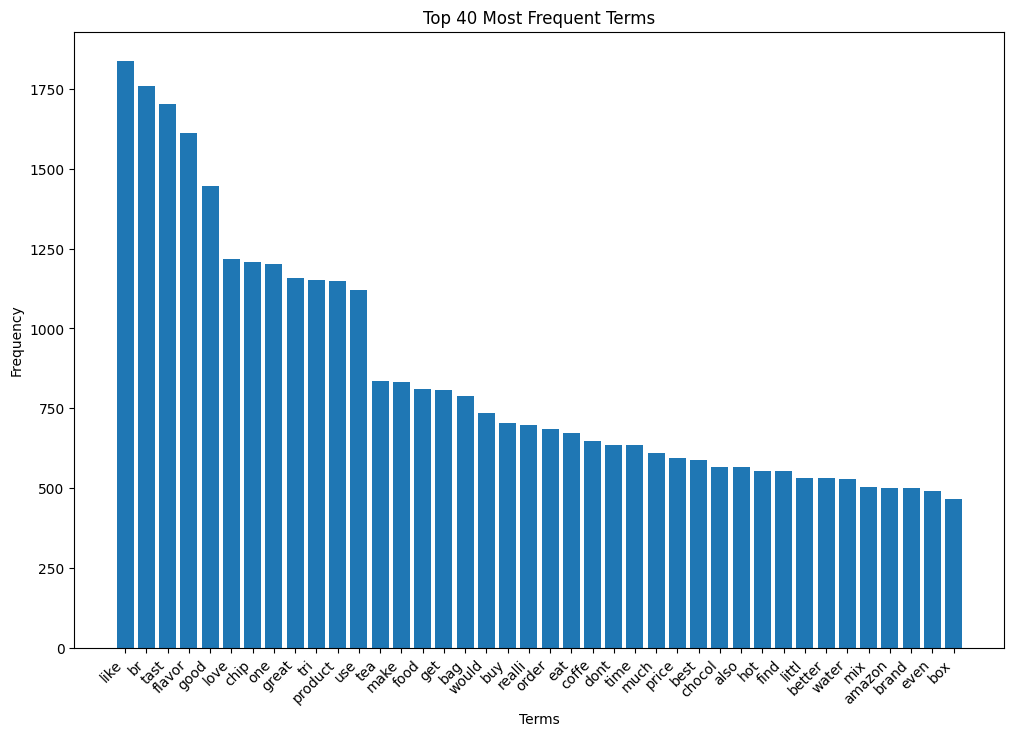

In [ ]:
import matplotlib.pyplot as plt


top_frequencies = frequencies.sort_values(ascending=False).head(40)

plt.figure(figsize=(12, 8))
plt.bar(top_frequencies.index, top_frequencies.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Terms')
plt.ylabel('Frequency')
plt.title('Top 40 Most Frequent Terms')
plt.show()


In [ ]:
#only words that appear in at least 1% of the reviews, i.e. at least 100 reviews
countvec2 = CountVectorizer(min_df=0.01)
sparse_dtm2 = countvec2.fit_transform(text_detokenized)

dtm2 = pd.DataFrame(sparse_dtm2.toarray(), columns=countvec2.get_feature_names_out(), index=reviews.index)
dtm2.sum().sort_values(ascending=False)

,0
like,1838
br,1761
tast,1702
flavor,1613
good,1446
...,...
anyway,41
terribl,41
bring,41
condit,40


In [ ]:
X = dtm2[:-1000]
y = reviews['Highest_Score'][:-1000]
validation_X = dtm2[-1000:].reset_index().drop(columns='index')
validation_y = reviews['Highest_Score'][-1000:].reset_index()['Highest_Score']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Logisitic Regression

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
logreg = LogisticRegression(C=0.1, random_state=88)

logreg.fit(X_train, y_train)

LogisticRegression(C=0.1, random_state=88)

In [ ]:
# Step 3: Make predictions
y_prob_lg = logreg.predict_proba(X_test)[:, 1]
y_pred_lg = (y_prob_lg > 0.6).astype(int)

# Step 4: Evaluate the model
cm = confusion_matrix(y_test, y_pred_lg)
accuracy = accuracy_score(y_test, y_pred_lg)
report = classification_report(y_test, y_pred_lg)
print("Confusion Matrix:\n", cm)
print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", report)

Confusion Matrix:
 [[225 129]
 [112 434]]

Accuracy: 0.7322222222222222

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.64      0.65       354
           1       0.77      0.79      0.78       546

    accuracy                           0.73       900
   macro avg       0.72      0.72      0.72       900
weighted avg       0.73      0.73      0.73       900



In [ ]:
# Step 5: Analyze performance on the training set (optional)
y_prob_train = logreg.predict_proba(X_train)[:, 1]
y_pred_train = (y_prob_train > 0.5).astype(int)
cm_train = confusion_matrix(y_train, y_pred_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("Confusion Matrix (Training Set):\n", cm_train)
print("\nAccuracy (Training Set):", accuracy_train)


Confusion Matrix (Training Set):
 [[ 518  240]
 [  64 1278]]

Accuracy (Training Set): 0.8552380952380952


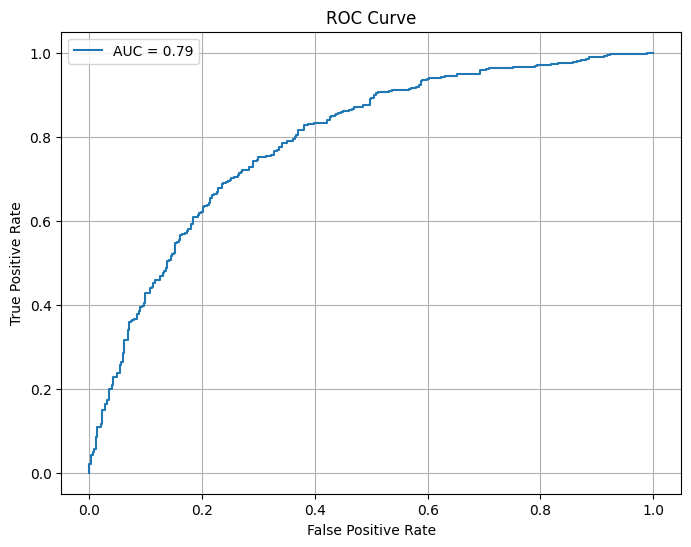

In [ ]:
#  Plot the ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_prob_lg)
roc_auc = roc_auc_score(y_test, y_prob_lg)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


# Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Initialize and train the Random Forest model with default parameters
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Initialize and train the Random Forest Classifier with default parameters
rf = RandomForestClassifier(max_features=5, min_samples_leaf=5, n_estimators=500, random_state=88)
rf.fit(X_train, y_train)

# Step 2: Make predictions and evaluate performance
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

cm = confusion_matrix(y_test, y_pred_rf)
accuracy = accuracy_score(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, y_prob_rf)

print("Confusion Matrix:\n", cm)
print("\nAccuracy:", accuracy)
print("\nROC AUC Score:", roc_auc)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Confusion Matrix:
 [[ 52 302]
 [  6 540]]

Accuracy: 0.6577777777777778

ROC AUC Score: 0.8262401440367542

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.15      0.25       354
           1       0.64      0.99      0.78       546

    accuracy                           0.66       900
   macro avg       0.77      0.57      0.52       900
weighted avg       0.74      0.66      0.57       900



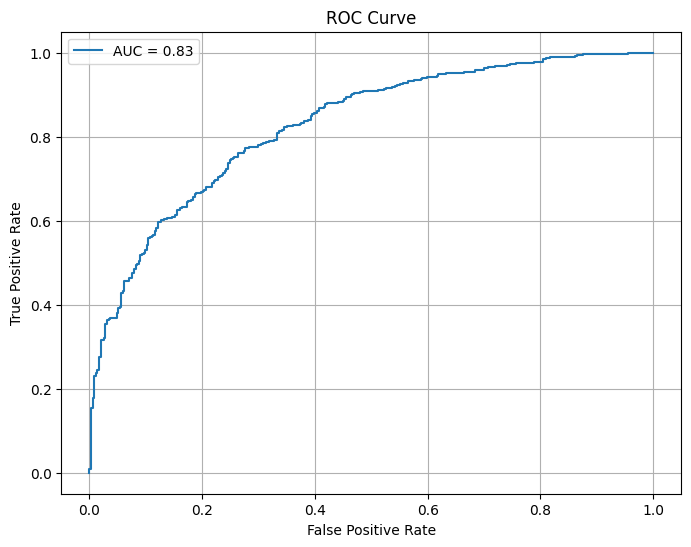

In [ ]:
# Step 3: Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Step 4: Hyperparameter tuning using GridSearchCV
param_grid = {
    'max_features': [3, 5, 7, 10],
    'min_samples_leaf': [1, 5, 10],
    'n_estimators': [100, 300, 500],
}

rf_cv = GridSearchCV(RandomForestClassifier(random_state=88), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_cv.fit(X_train, y_train)

print("Best Parameters:", rf_cv.best_params_)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'max_features': 10, 'min_samples_leaf': 1, 'n_estimators': 500}


In [ ]:
# Step 5: Evaluate the best model
y_pred_rf_cv = rf_cv.best_estimator_.predict(X_test)
y_prob_rf_cv = rf_cv.best_estimator_.predict_proba(X_test)[:, 1]

cm_cv = confusion_matrix(y_test, y_pred_rf_cv)
accuracy_cv = accuracy_score(y_test, y_pred_rf_cv)
roc_auc_cv = roc_auc_score(y_test, y_prob_rf_cv)

print("Confusion Matrix (Best Model):\n", cm_cv)
print("\nAccuracy (Best Model):", accuracy_cv)
print("\nROC AUC Score (Best Model):", roc_auc_cv)
print("\nClassification Report (Best Model):\n", classification_report(y_test, y_pred_rf_cv))

Confusion Matrix (Best Model):
 [[180 174]
 [ 42 504]]

Accuracy (Best Model): 0.76

ROC AUC Score (Best Model): 0.8324434510875189

Classification Report (Best Model):
               precision    recall  f1-score   support

           0       0.81      0.51      0.62       354
           1       0.74      0.92      0.82       546

    accuracy                           0.76       900
   macro avg       0.78      0.72      0.72       900
weighted avg       0.77      0.76      0.75       900



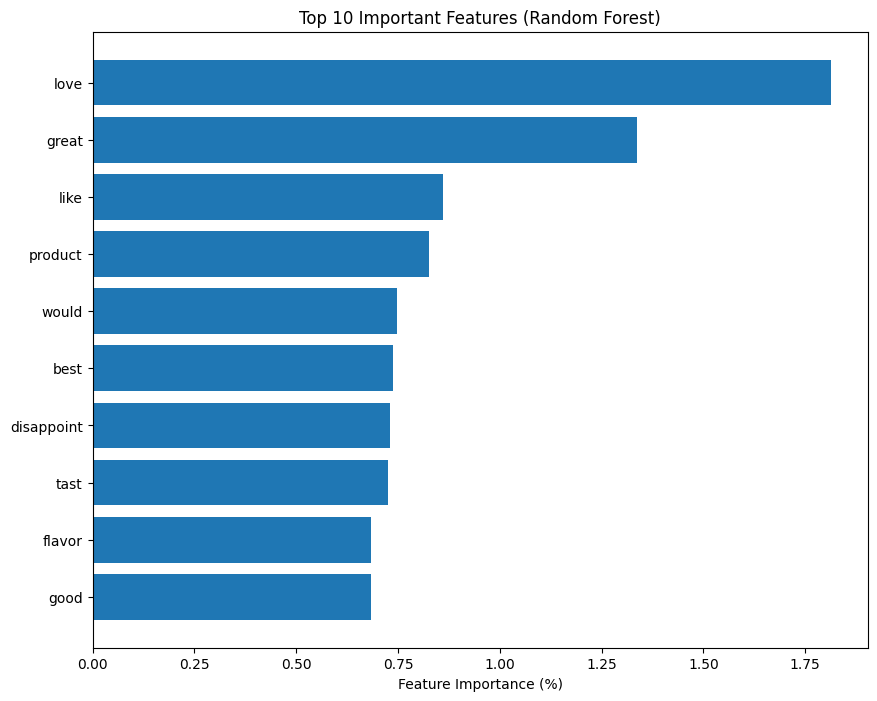

In [ ]:
# Step 6: Feature importance visualization
sorted_idx = rf_cv.best_estimator_.feature_importances_.argsort()[::-1]
feature_importances = rf_cv.best_estimator_.feature_importances_[sorted_idx]
feature_names = X_train.columns[sorted_idx]

plt.figure(figsize=(10, 8))
plt.barh(feature_names[:10], feature_importances[:10] * 100)
plt.xlabel('Feature Importance (%)')
plt.title('Top 10 Important Features (Random Forest)')
plt.gca().invert_yaxis()
plt.show()


# Gradient Boosting Model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train, y_train)

y_pred_gbc = gbc_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_gbc)
print("Accuracy:", accuracy)

Accuracy: 0.7244444444444444


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(y_test, y_pred_gbc))
print("AUC-ROC:", roc_auc_score(y_test, gbc_model.predict_proba(X_test)[:, 1]))


              precision    recall  f1-score   support

           0       0.78      0.42      0.54       354
           1       0.71      0.92      0.80       546

    accuracy                           0.72       900
   macro avg       0.74      0.67      0.67       900
weighted avg       0.74      0.72      0.70       900

AUC-ROC: 0.8052477183833117


In [ ]:
#Warning this cell takes a long time to run, > 10 minutes.
from sklearn.model_selection import GridSearchCV


X_train_subset = X_train.sample(frac=0.3, random_state=42)  # use 30% of the training data
y_train_subset = y_train[X_train_subset.index]

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 9],
}

grid_search = GridSearchCV(
    GradientBoostingClassifier(),
    param_grid,
    cv=3,  # I changed this from 5 to 3 to speed up computation
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train_subset, y_train_subset)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Training the best model after preforming gridsearch on a subset of the training set
gbc_final = GradientBoostingClassifier(**best_params)
gbc_final.fit(X_train, y_train)


from sklearn.metrics import classification_report, roc_auc_score
y_pred_gbc_cv = gbc_final.predict(X_test)
print(classification_report(y_test, y_pred_gbc_cv))
print("AUC-ROC:", roc_auc_score(y_test, gbc_final.predict_proba(X_test)[:, 1]))


Best Parameters: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.74      0.53      0.62       354
           1       0.74      0.88      0.81       546

    accuracy                           0.74       900
   macro avg       0.74      0.71      0.71       900
weighted avg       0.74      0.74      0.73       900

AUC-ROC: 0.8078837358498375


The Best parameters after preforming GridSearch on a subset of the training data (3000 rows) is {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}

The overall accuracy is 0.83, meaning the model correctly predicte sentiment for 83% of the reviews.

Class 0 (non positive):


*   Precision: of all reviews predicted as negative, 73% were actually negative
*   Recall: out of all actual negative reviews, the model correctly identified 47%


Class 1 (Positive):


*   Precision:  Of all reviews predicted as positive, 85% were actually positive
*   Recall: Out of all actual positive reviews, the model correctly identified 94%.


This shows the models preformance is somewhat skewed towards Class 1 which is the majority class.



In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve

# confusion matrix
cm = confusion_matrix(y_test, y_pred_gbc_cv)
print("Confusion Matrix:\n", cm)


tn, fp, fn, tp = cm.ravel()

tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

print('Accuracy:', np.mean(y_test==y_pred_gbc_cv))
print("TPR (Recall) for Class 1:", tpr)
print("FPR for Class 1:", fpr)


Confusion Matrix:
 [[189 165]
 [ 66 480]]
Accuracy: 0.7433333333333333
TPR (Recall) for Class 1: 0.8791208791208791
FPR for Class 1: 0.4661016949152542


The model correctly identifies 94.48% of all actual positive reviews. Here a high TPR indicates that the Gradient Boosting Classifier model is very good at detecting positive reviews.

However the model incorrectly labels 52.79% of negative reviews as positive. A high FPR suggests that our Gradient Boosting Classifier model struggles to accurately differentiate between positive and negative reviews.

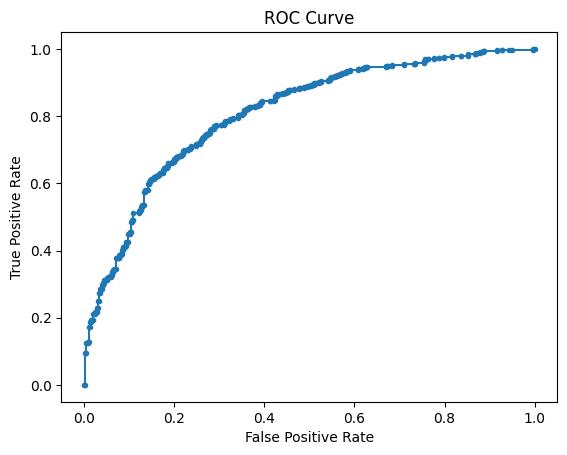

In [ ]:
#Using ChatGPT to plot
# Get the predicted probabilities
y_prob = gbc_final.predict_proba(X_test)[:, 1]  # Probability of positive class

# Compute TPR and FPR for different thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Print or plot TPR vs. FPR
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, marker='.')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


# CART

In [ ]:
print(y_train.value_counts())
print(y_test.value_counts())

Highest_Score
1    1342
0     758
Name: count, dtype: int64
Highest_Score
1    546
0    354
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

grid_values = {'ccp_alpha': np.linspace(0, 0.1, 101)}

dtc = DecisionTreeClassifier(random_state=88)
dtc_cv = GridSearchCV(dtc, param_grid=grid_values, cv=10).fit(X_train, y_train)

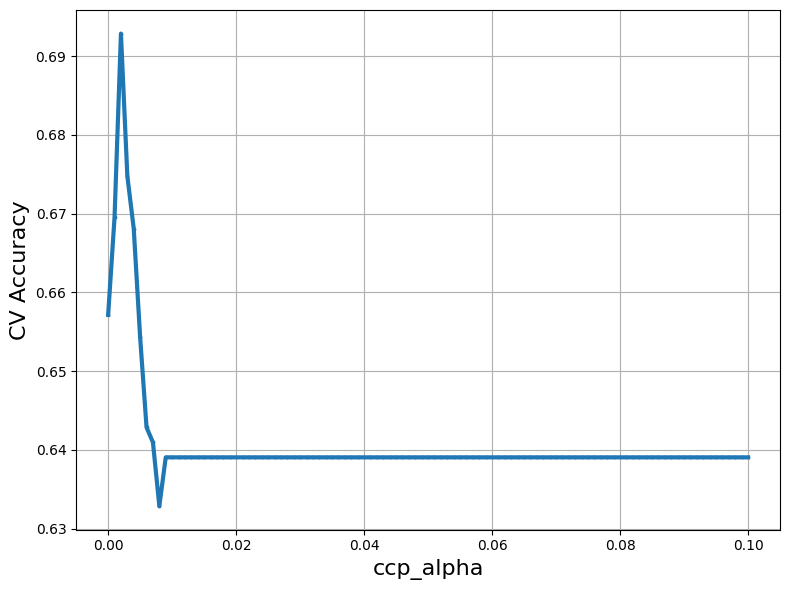

Best ccp_alpha {'ccp_alpha': 0.002}


In [ ]:
ccp_alpha = dtc_cv.cv_results_['param_ccp_alpha'].data
ACC_scores = dtc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(ccp_alpha, ACC_scores, s=3)
plt.plot(ccp_alpha, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best ccp_alpha', dtc_cv.best_params_)

Node count = 79


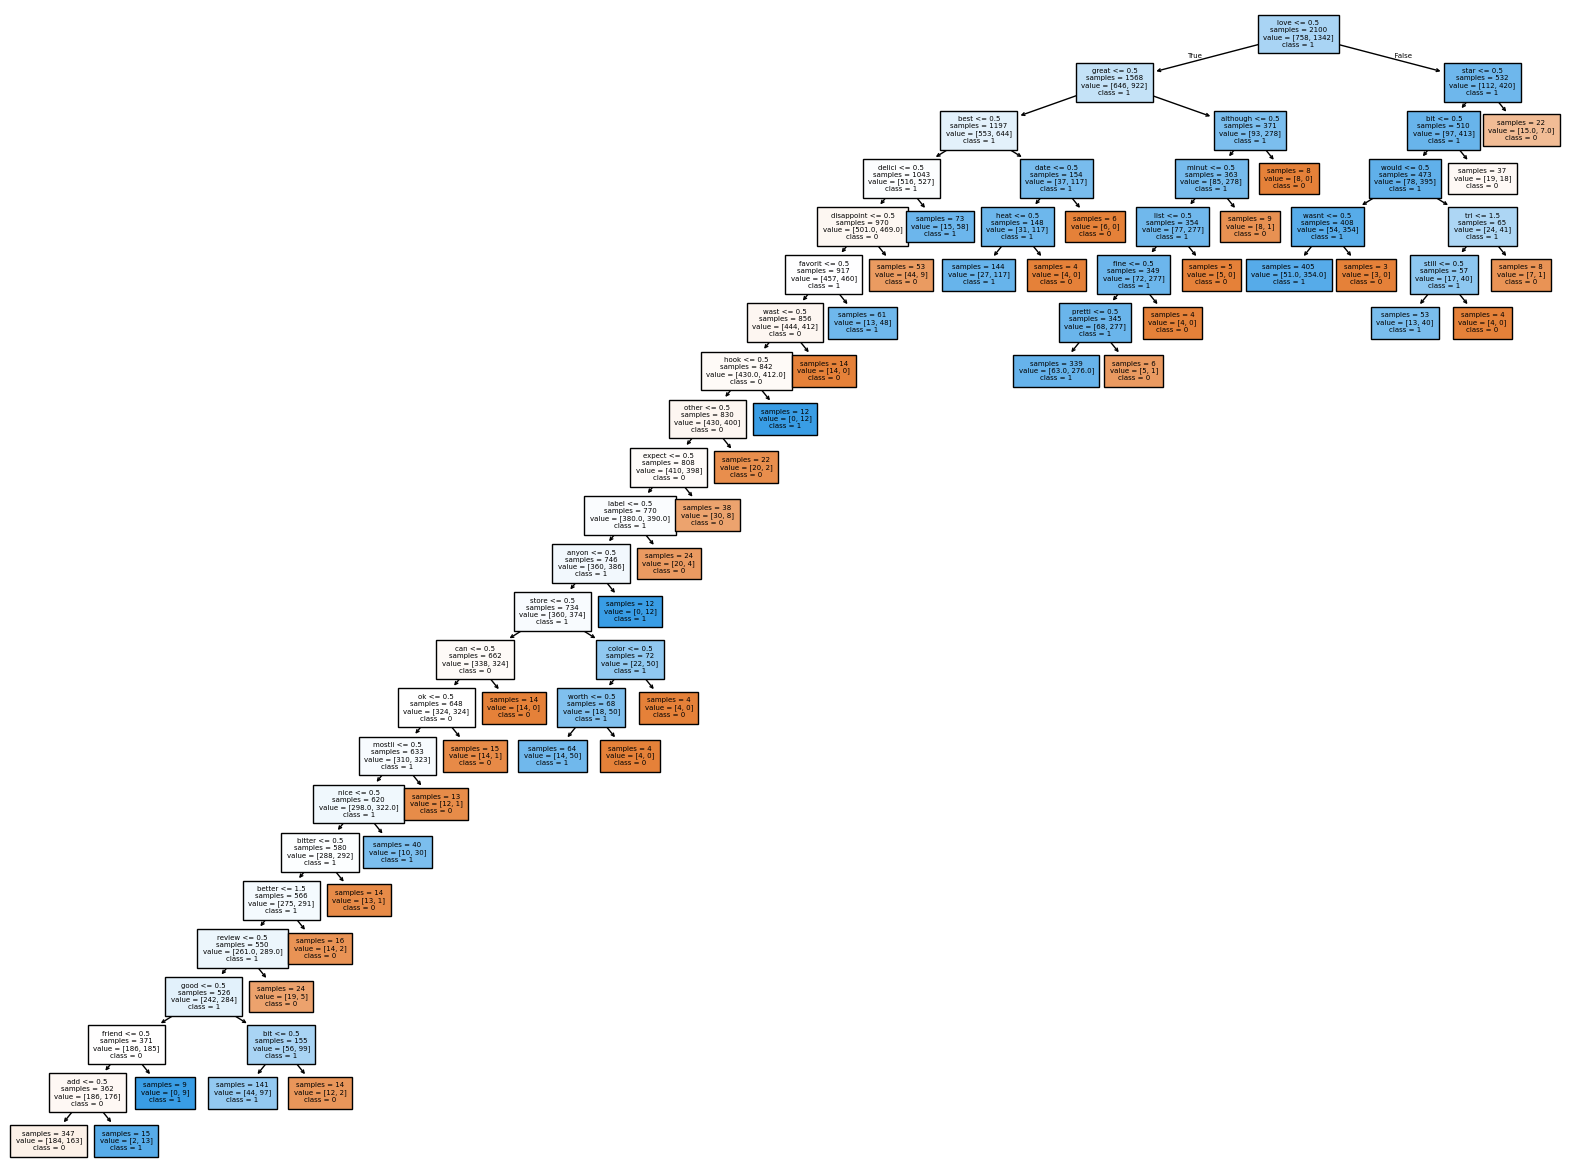

In [ ]:
from sklearn.tree import plot_tree

print('Node count =', dtc_cv.best_estimator_.tree_.node_count)
plt.figure(figsize=(20,15))
plot_tree(dtc_cv.best_estimator_,
          feature_names=X_train.columns,
          class_names=['0','1'],
          filled=True,
          impurity=False,
          fontsize=5)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred_cart_cv = dtc_cv.predict(X_test)
cm = confusion_matrix(y_test, y_pred_cart_cv)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred_cart_cv))

Confusion Matrix: 
 [[191 163]
 [142 404]]

Accuracy: 0.6611111111111111


# Blending

In [ ]:
blending_val_df = pd.DataFrame(data=validation_y)
blending_val_df['y_pred_lg']=logreg.predict(validation_X)
blending_val_df['y_pred_cart']=dtc_cv.predict(validation_X)
blending_val_df['y_pred_rf']=rf_cv.best_estimator_.predict(validation_X)
blending_val_df['y_pred_gbc']=gbc_final.predict(validation_X)
blending_val_df.head()

,Highest_Score,y_pred_lg,y_pred_cart,y_pred_rf,y_pred_gbc
0,1,1,0,1,1
1,1,1,0,1,1
2,1,1,1,1,1
3,1,1,1,1,1
4,1,1,1,1,1


In [ ]:
import statsmodels.formula.api as smf
blending_ols = smf.ols(formula='Highest_Score ~ y_pred_lg+y_pred_cart+y_pred_rf+y_pred_gbc -1', data=blending_val_df)
blending_res = blending_ols.fit()
print(blending_res.summary())

                                 OLS Regression Results                                
Dep. Variable:          Highest_Score   R-squared (uncentered):                   0.721
Model:                            OLS   Adj. R-squared (uncentered):              0.720
Method:                 Least Squares   F-statistic:                              643.6
Date:                Mon, 09 Dec 2024   Prob (F-statistic):                   2.78e-274
Time:                        19:08:00   Log-Likelihood:                         -567.52
No. Observations:                1000   AIC:                                      1143.
Df Residuals:                     996   BIC:                                      1163.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [ ]:
blending_test_df = pd.DataFrame(data=y_test)
blending_test_df['y_pred_lg']=logreg.predict(X_test)
blending_test_df['y_pred_cart']=dtc_cv.predict(X_test)
blending_test_df['y_pred_rf']=rf_cv.best_estimator_.predict(X_test)
blending_test_df['y_pred_gbc']=gbc_final.predict(X_test)
y_prob_blend = blending_res.predict(blending_test_df)
y_pred_blend = (y_prob_blend > 0.5).astype(int) # bayes optimal classifier

#Model Comparison

In [ ]:
baseline = np.ones(y_test.shape)
cm_lg = confusion_matrix(y_test, y_pred_lg)
cm_cart = confusion_matrix(y_test, y_pred_cart_cv)
cm_rf = confusion_matrix(y_test, y_pred_rf_cv)
cm_gbc = confusion_matrix(y_test, y_pred_gbc_cv)
cm_blend = confusion_matrix(y_test, y_pred_blend)
tn_lg, fp_lg, fn_lg, tp_lg = cm_lg.ravel()
tn_cart, fp_cart, fn_cart, tp_cart = cm_cart.ravel()
tn_rf, fp_rf, fn_rf, tp_rf = cm_rf.ravel()
tn_gbc, fp_gbc, fn_gbc, tp_gbc = cm_gbc.ravel()
tn_blend, fp_blend, fn_blend, tp_blend = cm_blend.ravel()

In [ ]:
model_comparison = pd.DataFrame(data={'Model':['Baseline','Logistic Regression','CART with CV','Random Forest with CV','Gradient Boosting with CV','Blending'],
                                      'Accuracy':[np.mean(y_test==1),np.mean(y_test==y_pred_lg),np.mean(y_test==y_pred_cart_cv),\
                                                  np.mean(y_test==y_pred_rf_cv),np.mean(y_test==y_pred_gbc_cv),np.mean(y_test==y_pred_blend)],
                                      'TPR':[np.sum(baseline==y_test)/np.sum(y_test==1),tp_lg/(tp_lg+fn_lg),tp_cart/(tp_cart+fn_cart),\
                                             tp_rf/(tp_rf+fn_rf),tp_gbc/(tp_gbc+fn_gbc),tp_blend/(tp_blend+fn_blend)],
                                      'FPR':[np.sum(baseline!=y_test)/np.sum(y_test==0),fp_lg/(fp_lg+tn_lg),fp_cart/(fp_cart+tn_cart),\
                                             fp_rf/(fp_rf+tn_rf),fp_gbc/(fp_gbc+tn_gbc),fp_blend/(fp_blend+tn_blend)]}).set_index('Model')
model_comparison

,Accuracy,TPR,FPR
Model,,,
Baseline,0.606667,1.000000,1.000000
Logistic Regression,0.732222,0.794872,0.364407
CART with CV,0.661111,0.739927,0.460452
Random Forest with CV,0.760000,0.923077,0.491525
Gradient Boosting with CV,0.743333,0.879121,0.466102
Blending,0.768889,0.904762,0.440678
